# Status of COVID-19 Cases in Ontario

URL: https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

daily_change_url = 'https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv'
#daily_change_url = 'data/covid19_ontario_daily.csv'
df = pd.read_csv(daily_change_url)

# Check last data point
print("Last data point on:", df.Date.max())

Last data point on: 2021-11-18


In [2]:
#df.columns

In [3]:
# Change date column to proper type and create another dataframe of dates to extract weekends
df.Date = pd.to_datetime(df.Date)
dfd = pd.DataFrame(df.Date)
dfd['day_of_week'] = dfd.Date.dt.day_of_week

# Monday = 0, weekend = 4,5,6
#dfd['is_wkend_holiday']=(dfd.day_of_week >= 4) * 1
dfd['is_wekend_holiday'] = 0   # ignore weekends

In [4]:
# extract holidays (2020, 2021)
import datetime
holidays = ['2020-01-01', '2020-02-17', '2020-04-10', '2020-05-18', '2020-07-01', '2020-09-07', '2020-10-12', '2020-12-25']
holidays.extend(['2021-01-01', '2021-02-15', '2021-04-02', '2021-05-24', '2021-07-01', '2021-09-06', '2021-10-11', '2021-12-25', '2021-12-26', '2021-12-27'])

# add halloweens and Valentines
holidays.extend(['2020-02-14', '2020-10-31', '2021-02-14', '2021-10-31'])
holidays = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in holidays]
for d in dfd.Date:
    if d in holidays:
        dfd.loc[dfd['Date']==d, "is_wkend_holiday"] = 1
        #print(dfd[dfd['Date']==d].is_wkend_holiday)
        
#dfd['is_wkend_holiday'] = dfd.is_wekend_holiday.fillna(0)
dfd.is_wkend_holiday = dfd.is_wkend_holiday.replace(np.nan, 0)

In [5]:
# check a holiday
dfd.loc[dfd.Date==datetime.datetime(2021,2,15)]
#dfd.loc[dfd.Date == datetime.datetime(2021,2,13)]


,Date,day_of_week,is_wekend_holiday,is_wkend_holiday
328,2021-02-15,0,0,1.0


In [6]:
# add columns for holiday+1 and holiday+5 days
holiday_add1 = (dfd.loc[dfd.is_wkend_holiday==1, "Date"] + datetime.timedelta(days=1)).tolist()
holiday_add5 = (dfd.loc[dfd.is_wkend_holiday==1, "Date"] + datetime.timedelta(days=5)).tolist()

dfd['holiday_add1'] = 0
dfd['holiday_add5'] = 0

for d in dfd.Date:
    if d in holiday_add1:
        dfd.loc[dfd['Date']==d, "holiday_add1"] = 1
    if d in holiday_add5:
        dfd.loc[dfd['Date']==d, "holiday_add5"] = 1

dfd.set_index('Date', inplace=True)

In [7]:
# Set df dataframe index to the date column
df.set_index('Date', inplace=True)

In [8]:
# save a copy (uncomment the following statement)
df.to_csv('data/covid19_ontario_daily.csv')

<AxesSubplot:xlabel='Date'>

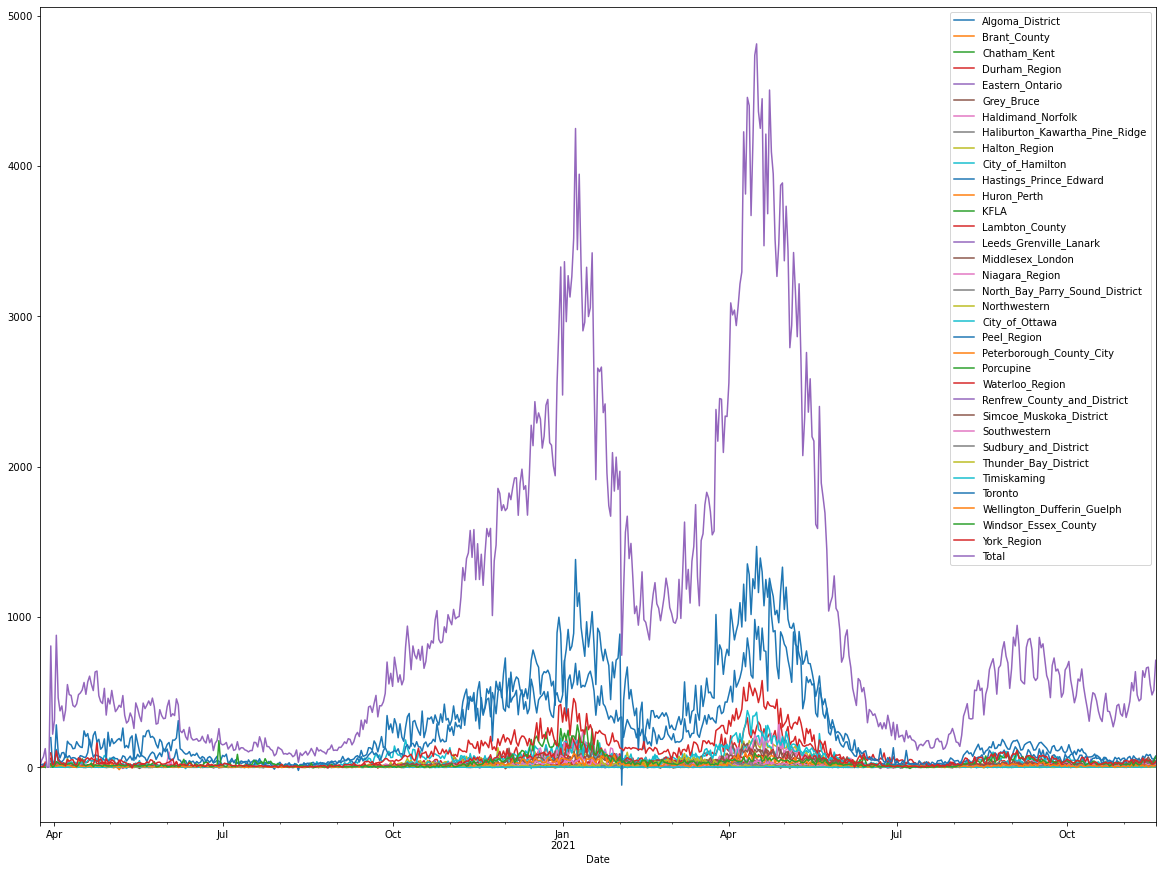

In [9]:
plt.rcParams['figure.figsize']=(20,15)
df.plot()
#plt.show()

In [10]:
# Check correlations

print("Torono-York:", df.Toronto.corr(df.York_Region))
print("Peel-Algoma:", df.Peel_Region.corr(df.Algoma_District))
print("Ottawa-holidays:", df.City_of_Ottawa.corr(dfd.is_wkend_holiday))
print("Toronto-holidays+5:", df.Toronto.corr(dfd.holiday_add5))

Torono-York: 0.9370051581376958
Peel-Algoma: 0.14047122283320282
Ottawa-holidays: 0.0023617907062557244
Toronto-holidays+5: 0.024069096667705812


<AxesSubplot:xlabel='Date'>

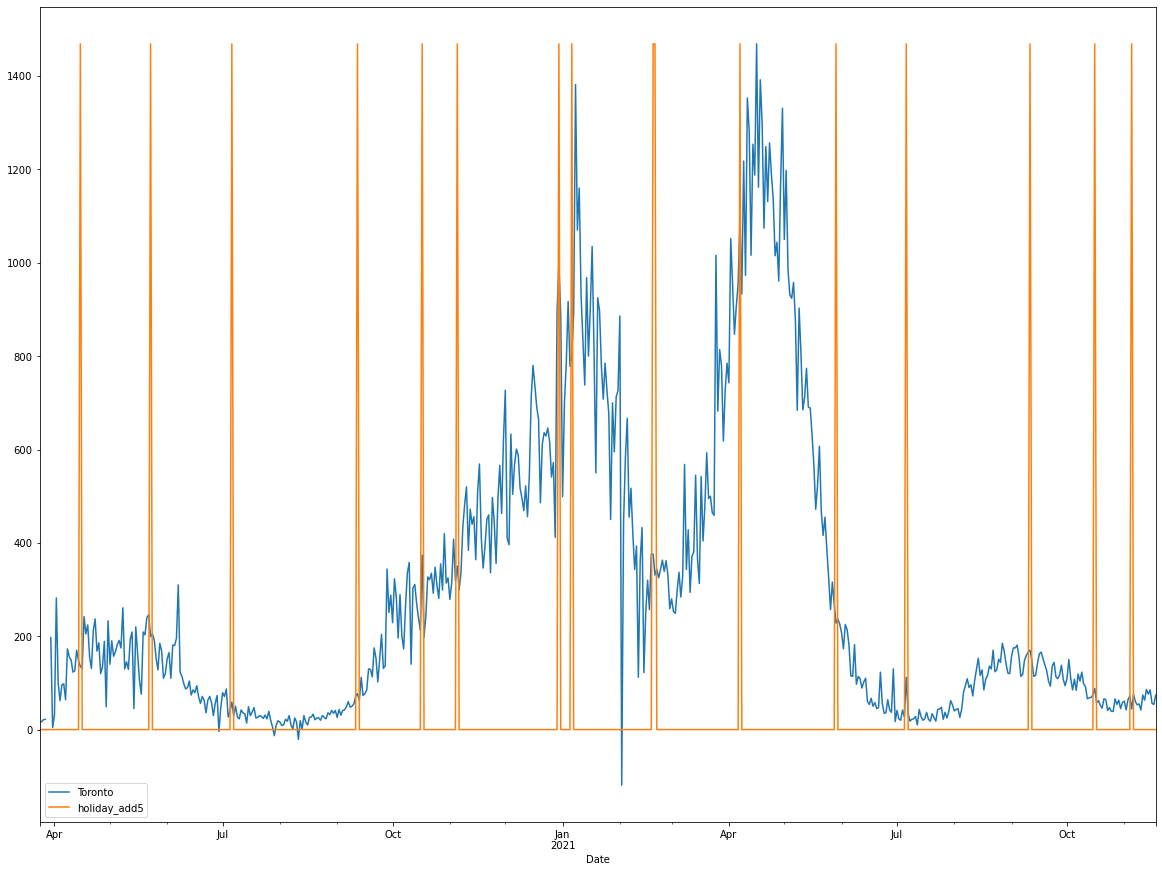

In [11]:
# Visual check on effect of holidays (+5 days)
df1 = df.join(dfd)[['Toronto','holiday_add5']]
df1.holiday_add5 *= df1.Toronto.max()   # normalize holidays to Toronto scale
df1.plot()

## Check on the latest stats:

In [12]:
df[df.index==pd.to_datetime(datetime.datetime.now().date())]

,Algoma_District,Brant_County,Chatham_Kent,Durham_Region,Eastern_Ontario,Grey_Bruce,Haldimand_Norfolk,Haliburton_Kawartha_Pine_Ridge,Halton_Region,City_of_Hamilton,...,Simcoe_Muskoka_District,Southwestern,Sudbury_and_District,Thunder_Bay_District,Timiskaming,Toronto,Wellington_Dufferin_Guelph,Windsor_Essex_County,York_Region,Total
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-18,26.0,16.0,4.0,33.0,15.0,5.0,11.0,4.0,12.0,23.0,...,67.0,15.0,27.0,4.0,4.0,74.0,12.0,71.0,39.0,711
